# WeatherPy
 - Most cities are in the northnern hemisphere
 - There is a definitive relationship between temperature and distance from the equator
 - It appears there is a less definitive relationship betweeen distance from the equator and windspeed. As you move farther from the equator, wind speeds are higher.

In [3]:
import pandas as pd
import json
from config import api_key
from citipy import citipy
import requests
import matplotlib.pyplot as plt
import random
import datetime

weather_url = 'http://api.openweathermap.org/data/2.5/weather?'

## Generate List of Cities and Make API Calls

In [15]:
number_of_cities = 500
cities = []
city_dicts = []
while len(cities) < number_of_cities:
    rand_lat = random.uniform(-90, 90)
    rand_lon = random.uniform(-180, 180)
    city = citipy.nearest_city(rand_lat, rand_lon)
    if city not in cities:
        city_name = city.city_name.replace(' ', '')
        country_code = city.country_code
        city_query_string = f'{city_name},{country_code}'
        params = {'appid': api_key,
                  'q': city_query_string,
                  'units': 'imperial'
                 }
        response = requests.get(weather_url, params=params)
        if response.status_code == 200:
            response_data = response.json()
            temp = response_data['main']['temp']
            humidity = response_data['main']['humidity']
            cloudiness = response_data['clouds']['all']
            wind_speed =  response_data['wind']['speed']
            lat = response_data['coord']['lat']
            lon = response_data['coord']['lon']
            name = response_data['name']
            country = response_data['sys']['country']
            city_date = {'city': name, 'country': country, 'temp': temp,
                         'humidity': humidity, 'cloudiness': cloudiness,
                         'wind_speed': wind_speed, 'lat': lat, 'long': lon}
            city_dicts.append(city_date)
            cities.append(city)
            print('%i - %s, %s' % (len(cities), name, country))
        else:
            pass
    else:
        pass
temperature_df = pd.DataFrame(city_dicts)
temperature_df['humidity']
temperature_df['cloudiness']
temperature_df.to_csv('open_weather_data.csv', index=False)
temperature_df

1 - Busselton, AU
2 - Lima, US
3 - Hermanus, ZA
4 - Uray, RU
5 - Butaritari, KI
6 - Koslan, RU
7 - Tuktoyaktuk, CA
8 - Bowen, AU
9 - Lalibela, ET
10 - Novochernorechenskiy, RU
11 - Ixtapa, MX
12 - Urubicha, BO
13 - Narsaq, GL
14 - Ushuaia, AR
15 - Bluff, NZ
16 - Mahebourg, MU
17 - Soria, ES
18 - Rikitea, PF
19 - Vaini, TO
20 - Bonavista, CA
21 - Kapaa, US
22 - Visnes, NO
23 - Hit, IQ
24 - Mwingi, KE
25 - Tecalitlan, MX
26 - Baruun-Urt, MN
27 - Hobart, AU
28 - Albany, AU
29 - Port-Cartier, CA
30 - Srednekolymsk, RU
31 - Castro, CL
32 - Pisco, PE
33 - Nanortalik, GL
34 - Durango, US
35 - Souillac, MU
36 - Saint-Francois, GP
37 - Hithadhoo, MV
38 - Chapais, CA
39 - Oudtshoorn, ZA
40 - Barrow, US
41 - Nouadhibou, MR
42 - Cariamanga, EC
43 - Iqaluit, CA
44 - Poum, NC
45 - Jamestown, SH
46 - Upernavik, GL
47 - Dikson, RU
48 - Qaanaaq, GL
49 - Bengkulu, ID
50 - Hilo, US
51 - Ilulissat, GL
52 - Laguna, BR
53 - Khandyga, RU
54 - Khatanga, RU
55 - Sawtell, AU
56 - Aitape, PG
57 - Thompson, CA
58

445 - Zaragoza, ES
446 - Balabac, PH
447 - Gorin, RU
448 - Batagay-Alyta, RU
449 - Orlik, RU
450 - Ust-Kuyga, RU
451 - Drabiv, UA
452 - Rafaela, AR
453 - Ende, ID
454 - Ulaanbaatar, MN
455 - Sulphur, US
456 - Pangody, RU
457 - Batsfjord, NO
458 - Hamilton, US
459 - Maxixe, MZ
460 - Kenai, US
461 - Amarante, BR
462 - Piranhas, BR
463 - Moussoro, TD
464 - Atasu, KZ
465 - Affery, CI
466 - Knyaze-Volkonskoye, RU
467 - Gornyak, RU
468 - Tacuarembo, UY
469 - Hambantota, LK
470 - Evensk, RU
471 - Praya, ID
472 - Kilifi, KE
473 - Burnie, AU
474 - Dhidhdhoo, MV
475 - Kautokeino, NO
476 - Roald, NO
477 - Ust-Kut, RU
478 - Mayumba, GA
479 - Konstantinovo, RU
480 - Guatire, VE
481 - Ormara, PK
482 - Lagoa, PT
483 - Shingu, JP
484 - Ferme-Neuve, CA
485 - Paraiso, MX
486 - Whitehorse, CA
487 - Messina, IT
488 - Tornio, FI
489 - Manukan, PH
490 - Ostersund, SE
491 - Shelburne, CA
492 - Ridgecrest, US
493 - Makinsk, KZ
494 - Linjiang, CN
495 - Smolenka, RU
496 - Nemuro, JP
497 - Tuatapere, NZ
498 - Do

,city,cloudiness,country,humidity,lat,long,temp,wind_speed
0,Busselton,76,AU,100,-33.65,115.33,61.12,10.87
1,Lima,90,US,100,40.74,-84.11,55.99,16.11
2,Hermanus,0,ZA,59,-34.42,19.23,63.23,3.71
3,Uray,80,RU,89,60.12,64.78,23.09,5.84
4,Butaritari,0,KI,100,3.07,172.79,83.44,1.14
5,Koslan,88,RU,84,63.46,48.90,33.17,7.29
6,Tuktoyaktuk,90,CA,84,69.45,-133.04,3.20,9.17
7,Bowen,75,AU,94,-20.02,148.23,68.00,1.12
8,Lalibela,0,ET,55,12.03,39.03,50.77,1.92
9,Novochernorechenskiy,36,RU,85,56.27,91.08,21.47,6.06


## Create Scatter Plots

In [41]:
def create_latitude_scatter_plot(df, y_axis_col, y_axis_title):
    plt.style.use('ggplot')
    plt.scatter(df['lat'], df[y_axis_col])
    now = datetime.datetime.now()
    plt.title(f'{y_axis_title} vs. Latitude - {now.month}/{now.day}/{now.year}')
    plt.xlabel('Latitude')
    plt.ylabel(y_axis_title)
    plt.xlim(-90, 90)
    plt.xticks(range(-90, 91, 30))
    plt.savefig(f'{y_axis_title} {now.month}_{now.day}_{now.year}.png')
    plt.show()

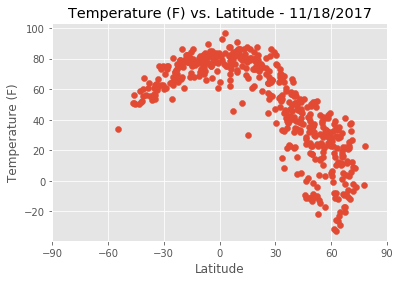

In [42]:
create_latitude_scatter_plot(temperature_df, 'temp', 'Temperature (F)')

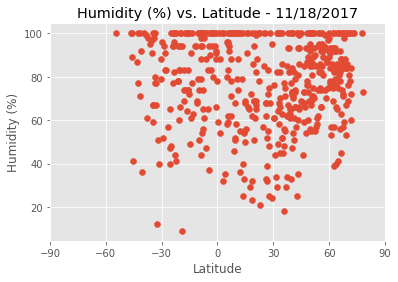

In [43]:
create_latitude_scatter_plot(temperature_df, 'humidity', 'Humidity (%)')

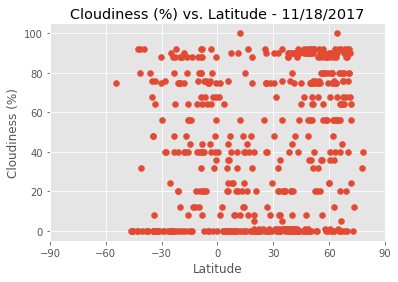

In [44]:
create_latitude_scatter_plot(temperature_df, 'cloudiness', 'Cloudiness (%)')

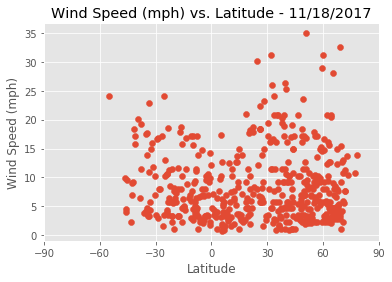

In [45]:
create_latitude_scatter_plot(temperature_df, 'wind_speed', 'Wind Speed (mph)')